In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [20]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh.variables['tmask'][0]
print (tmask.shape)

(40, 898, 398)


In [3]:
imin, imax = 350, 600
jmin, jmax = 150, 350

In [23]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale, timestep=0):
    green = np.ma.array(ng.variables[variable][timestep], mask=1-tmask)
    hind = np.ma.array(hd.variables[variable][timestep], mask=1-tmask)
    print (np.nanmean(green[0]), np.nanmean(hind[0]), np.nanmean(hind[0])-np.nanmean(green[0]))

    colors = axs[0, 0].pcolormesh(green[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 0], extend='both')

    colors = axs[0, 1].pcolormesh(hind[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 1], extend='both')

    colors = axs[0, 2].pcolormesh(hind[0, imin:imax, jmin:jmax] - green[0, imin:imax, jmin:jmax], cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[0, 2], extend='both')

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
  
    for i in range(1, 3):
        cbar = vis.contour_thalweg(axs[i, 0], green, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 1], hind, bathy, mesh, np.arange(vminm, 1.02*vmaxm, 0.05*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 2], hind-green, bathy, mesh, np.arange(-scale, 1.05*scale, 0.1*scale), cmap='bwr')
    for ax in [axs[2, 0], axs[2, 1], axs[2, 2]]:
        ax.set_ylim((20, 0))
        ax.set_xlim((300, 500))
        
    axs[0,0].set_title('OPS '+name)
    axs[0,1].set_title('GEMLAM '+name)
    axs[0,2].set_title('GEMLAM - Ops')

In [36]:
def make_plots_2d(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale, timestep=0):
    green = np.array(ng.variables[variable][timestep])
    print (green.shape)
    hind = np.array(hd.variables[variable][timestep])

    colors = axs[0].pcolormesh(green, cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0], extend='both')

    colors = axs[1].pcolormesh(hind, cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[1], extend='both')

    colors = axs[2].pcolormesh(hind - green, cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[2], extend='both')

    for ax in axs:
        viz_tools.set_aspect(ax)
  
        
    axs[0].set_title('OPS '+name)
    axs[1].set_title('GEMLAM '+name)
    axs[2].set_title('GEMLAM - Ops')

In [90]:
def make_plots_2d_sum(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale):
    green = np.array(ng.variables[variable]).mean(axis=0)
    hind = np.array(hd.variables[variable]).mean(axis=0)
    print (green[145, 140], hind[145, 140], hind[145,140]-green[145, 140])

    colors = axs[0].pcolormesh(green, cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0], extend='both')

    colors = axs[1].pcolormesh(hind, cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[1], extend='both')

    colors = axs[2].pcolormesh(hind - green, cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[2], extend='both')

    for ax in axs:
        viz_tools.set_aspect(ax)
  
        
    axs[0].set_title('OPS '+name)
    axs[1].set_title('GEMLAM '+name)
    axs[2].set_title('GEMLAM - Ops')

# Physics

In [163]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1d_20141101_20141118_grid_T_20141118-20141118.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1d_20141101_20141118_grid_T_20141118-20141118.nc')

8.2462845 8.610719 0.36443424


/ocean/sallen/allen/research/Meopar/Tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


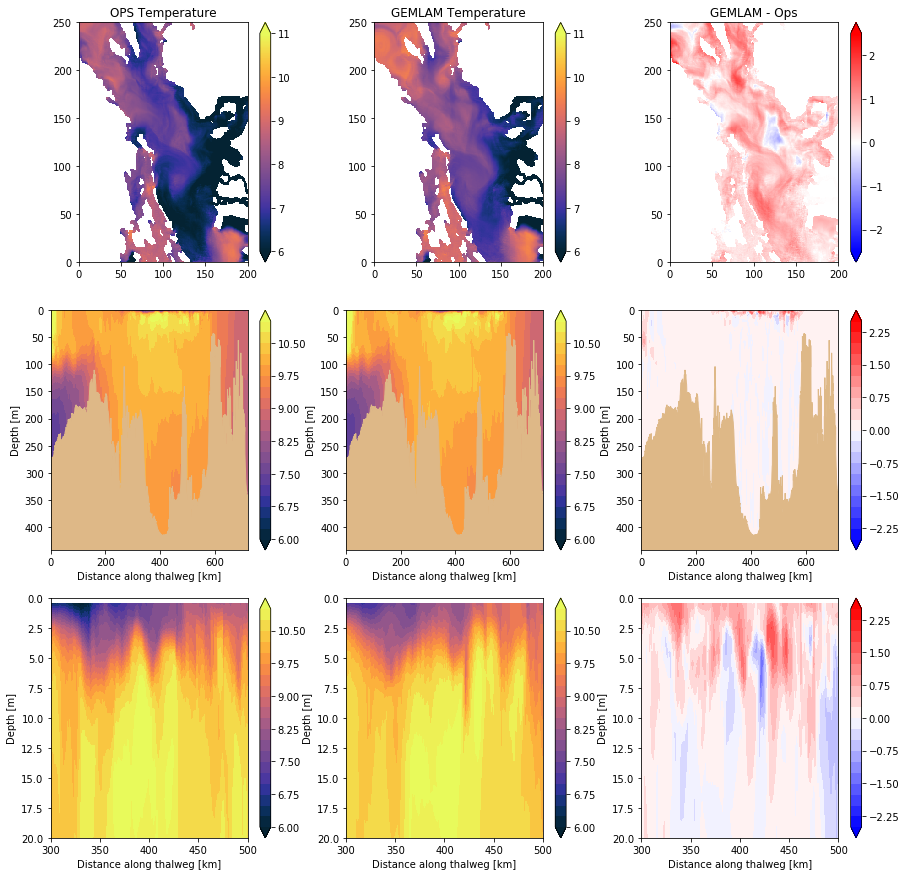

In [165]:
variable, name, cmap = 'votemper', 'Temperature', cm.thermal
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 11, 6, 2.5, timestep=0)

25.289608 25.201254 -0.08835411


/ocean/sallen/allen/research/Meopar/Tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


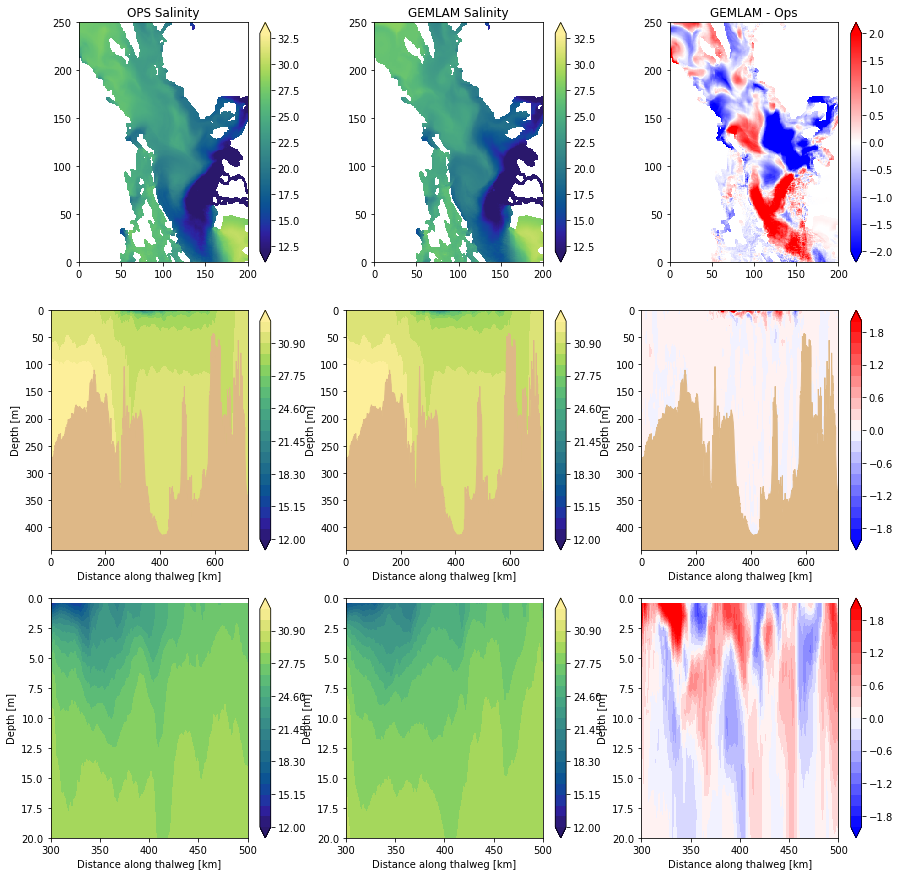

In [25]:
variable, name, cmap = 'vosaline', 'Salinity', cm.haline
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 33, 12, 2, timestep=0)

In [124]:
ops = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m11d17.nc')
gem = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2014m11d17.nc')

249.94543 267.86334 17.917908


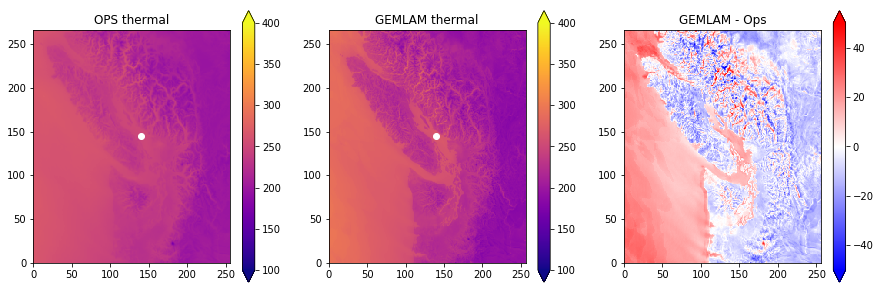

In [125]:
variable, name, cmap = 'therm_rad', 'thermal', 'plasma'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d_sum(fig, axs, variable, name, ops, gem, cmap, 400, 100, 50)
axs[0].plot(140, 145, 'wo')
axs[1].plot(140, 145, 'wo')

I am seeing about a 13.6 W bias and a root mean square error of 15.9 W.   
Chose LongWaveParametrization.ipynb shows a bias of 1.1 W over a random sample and a root mean square error of 17.9 W  
So bias is bad but RMSE is right on.  And Nov is a specific time.  

In [126]:
# We have 13.6 W/ m2 extra coming in over 2.5 m for 18 days
print (13.6/2.5*86400*18/4.2e3/1e3)

2.014354285714285


(266, 256)


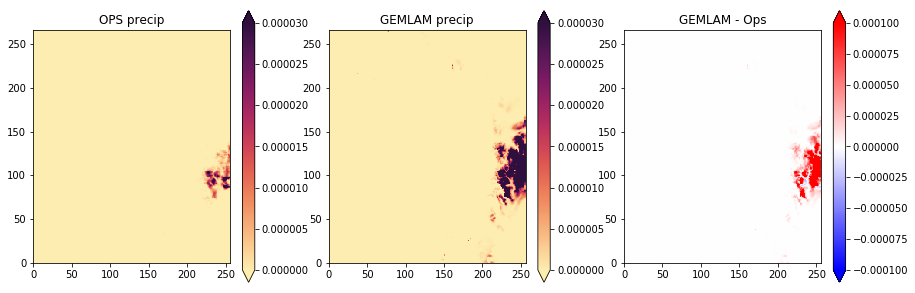

In [48]:
variable, name, cmap = 'precip', 'precip', cm.matter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ops, gem, cmap, 3e-5, 0, 1e-4, timestep=18)

In [49]:
gem

<xarray.Dataset>
Dimensions:           (time_counter: 24, x: 256, y: 266)
Coordinates:
  * time_counter      (time_counter) datetime64[ns] 2014-11-11 ... 2014-11-11T23:00:00
Dimensions without coordinates: x, y
Data variables:
    atmpres           (time_counter, y, x) float32 ...
    percentcloud      (time_counter, y, x) float32 ...
    PRATE_surface     (time_counter, y, x) float32 ...
    nav_lat           (y, x) float32 ...
    nav_lon           (y, x) float32 ...
    precip            (time_counter, y, x) float32 ...
    qair              (time_counter, y, x) float32 ...
    RH_2maboveground  (time_counter, y, x) float32 ...
    solar             (time_counter, y, x) float32 ...
    tair              (time_counter, y, x) float32 ...
    therm_rad         (time_counter, y, x) float32 ...
    u_wind            (time_counter, y, x) float32 ...
    v_wind            (time_counter, y, x) float32 ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Mon May 

(266, 256)


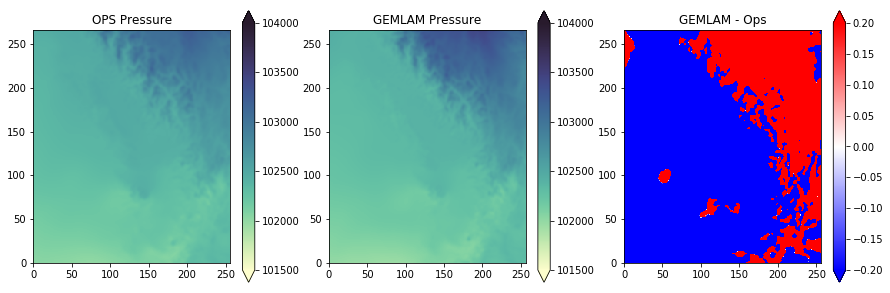

In [63]:
variable, name, cmap = 'atmpres', 'Pressure', cm.deep
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ops, gem, cmap, 104000, 101500, 0.2, timestep=0)

(266, 256)


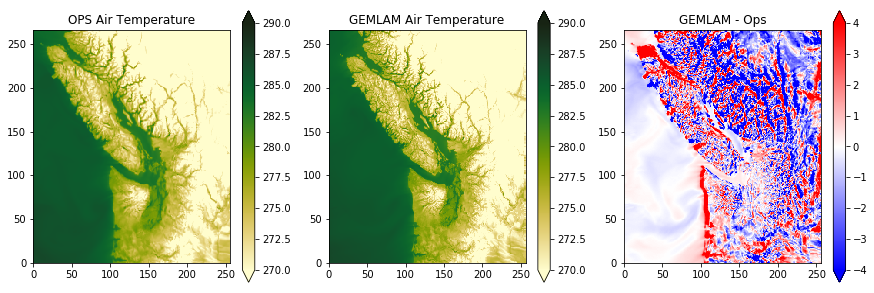

In [67]:
variable, name, cmap = 'tair', 'Air Temperature', cm.speed
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ops, gem, cmap, 290, 270, 4, timestep=4)

(266, 256)


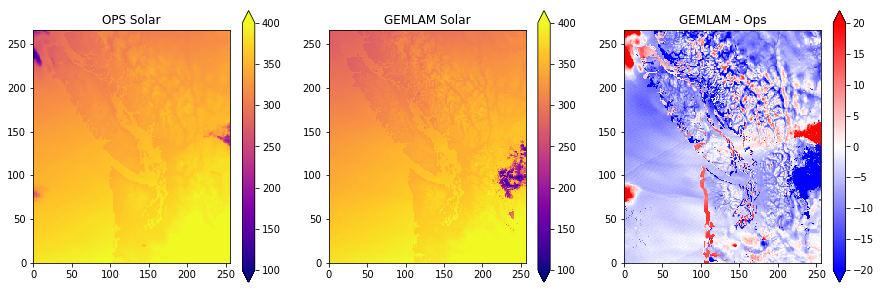

In [77]:
variable, name, cmap = 'solar', 'Solar', 'plasma'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ops, gem, cmap, 400, 100, 20, timestep=19)

(266, 256)


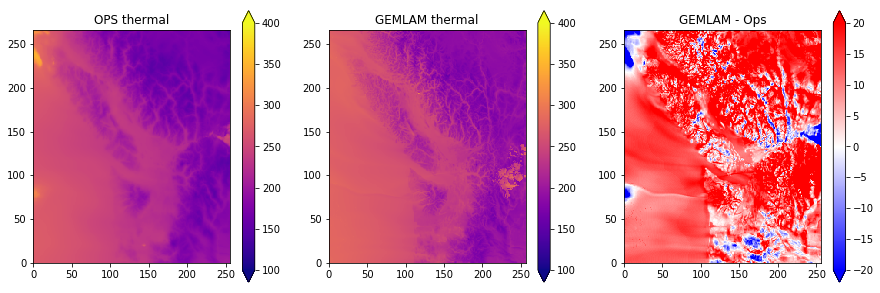

In [78]:
variable, name, cmap = 'therm_rad', 'thermal', 'plasma'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ops, gem, cmap, 400, 100, 20, timestep=19)

# Velocity

In [ ]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops_oneday/SalishSea_1h_20141101_20141101_grid_V_20141101-20141101.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam_oneday/SalishSea_1h_20141101_20141101_grid_V_20141101-20141101.nc')

In [ ]:
variable, name, cmap = 'vomecrty', 'Along-strait Velocity', cm.balance
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.2, -0.2, 0.1, timestep=2)

Stronger currents to the north throughout the main strait, consistent with stronger winds to the north.

In [ ]:
variable, name, cmap = 'vtau', 'Along-Strait Windstress', cm.balance
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots_2d(fig, axs, variable, name, ng, hd, cmap, 0.05, -0.05, 0.02, timestep=0)

In [ ]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1h_20141101_20141118_grid_U_20141101-20141101.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1h_20141101_20141118_grid_U_20141101-20141101.nc')

In [ ]:
variable, name, cmap = 'vozocrtx', 'Across-strait Velocity', cm.balance
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 0.5, -0.5, 0.05, timestep=2)

In central strait stronger currents to the west and in the southern strait stronger currents to the east.

# Biology

In [ ]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1d_20141101_20141118_ptrc_T_20141118-20141118.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1d_20141101_20141118_ptrc_T_20141118-20141118.nc')

In [ ]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 40, 0, 5)

In [ ]:
variable, name, cmap = 'silicon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 60, 0, 5)

In [ ]:
variable, name, cmap = 'diatoms', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 4, 0, 0.5)

In [ ]:
variable, name, cmap = 'flagellates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 4, 0, 0.5)

In [ ]:
variable, name, cmap = 'ciliates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2, 0, 0.5)

In [ ]:
variable, name, cmap = 'microzooplankton', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2, 0, 0.5)

# Carbon

In [ ]:
ng = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/ops/SalishSea_1d_20141101_20141118_carp_T_20141118-20141118.nc')
hd = xr.open_dataset('/data/sallen/results/MEOPAR/test_rpn/gemlam/SalishSea_1d_20141101_20141118_carp_T_20141118-20141118.nc')

In [ ]:
variable, name, cmap = 'dissolved_inorganic_carbon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2250, 500, 100)

In [ ]:
variable, name, cmap = 'total_alkalinity', 10, cm.ice_r
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 2250, 500, 100)

In [ ]:
variable, name, cmap = 'dissolved_oxygen', 10, cm.oxy
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, ng, hd, cmap, 170, 70, 40)

In [ ]:
import netCDF4 as nc

In [ ]:
ncds = nc.Dataset('/home/sallen/MEOPAR/grid/weights-gem2.5-ops_201702.nc')

In [ ]:
plt.pcolormesh(ncds.variables['src01'])
plt.colorbar()
print(np.array(ncds.variables['src01']).max(axis=0).max(axis=0))

In [ ]:
gmds = nc.Dataset('/home/sallen/MEOPAR/grid/weights-gem2.5-gemlam_201702.nc')

In [ ]:
plt.pcolormesh(gmds.variables['src01'])
plt.colorbar()
print(np.array(gmds.variables['src01']).max(axis=0).max(axis=0))

In [ ]:
ops = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m11d01.nc')

In [ ]:
plt.pcolormesh(ops.variables['u_wind'][0], cmap=cm.balance, vmax=10, vmin=-10)
plt.colorbar()
print(np.array(ops.variables['u_wind'][0]).max(axis=0).max(axis=0))

In [ ]:
gem = nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2014m11d01.nc')

In [ ]:
plt.pcolormesh(gem.variables['u_wind'][0], cmap=cm.balance, vmax=10, vmin=-10)
plt.colorbar()
print(np.array(gem.variables['u_wind'][0]).max(axis=0).max(axis=0))